In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ALL MODULES
import pandas as pd
import nltk as nl 
import re
!pip install contractions
!pip install emoji --upgrade
from emoji import demojize
import contractions
from typing import List

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.0 MB/s 
     |████████████████████████████████| 110 kB 78.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 4.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=1d8298635c2f48861ab1aafd6a453b2a274fab9d7c059d7a26d4f8bc173026f3
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


# **Step 1 - Merge all csv files** 
- merge csv files using pandas
- drop all columns except column
- turn object into a pandas dataframe

In [ ]:
# merging all csv files
files =  ['/content/drive/MyDrive/XMP Preprocessing/AAAJ AAJC Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/AILANational Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/BAJItweet Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/BreitbartNews Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/FAIRImmigration Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/ICEgov Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/IngrahamAngle Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/StatePRM Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/TuckerCarlson Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/UNHCRUSA Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/splcenter Cleaned - Final.csv'] 

df = pd.concat(
    map(pd.read_csv, files), ignore_index=True)
df = df['Content']
df = df.to_frame()

In [ ]:
print(df.head(20))

                                              Content
0   -16,000 Southeast Asian Americans have receive...
1   .@AALDEF’s Jerry Vattamala on how to combat vo...
2   .@ActToChange, an org focused on addressing bu...
3   .@CAIRNational’s @NihadAwad emphasizes that Pr...
4   .@CaryChow_, our master of ceremonies, kicks o...
5   .@CaryChow_: “This is an organization that we ...
6   .@CaryChow: “The American Courage Awards honor...
7   .@defineamerican, @staymacro, @colorofchange, ...
8   .@DefineAmerican's new video series is spreadi...
9   .@gabriellexgem of @GeorgetownCPT highlights i...
10  .@HouseJudiciary is marking up the #NOBANAct t...
11  .@IAmAmnaNawaz to @governorcalvo: Why are you ...
12  .@IlhanMN delivering powerful remarks during t...
13  .@JoeBiden says he will give small businesses ...
14  .@johncyangdc notes that if you are able to, b...
15  .@johncyangdc says there are dangerous consequ...
16  .@johncyangdc: “A new dawn requires all of us ...
17  .@johncyangdc: “Nothing 

In [ ]:
print(df.head(1).values.tolist())

[['-16,000 Southeast Asian Americans have received final orders of removal\n-4,197 Indian asylum seekers were arrested… https://t.co/LgmQq3eWQD']]


# **Step 2: Clean corpus with regular expressions**
- remove spaces
- remove urls
- remove numbers
- remove handles
- remove emojis

In [ ]:
def preprocess_tweet(tweet: str) -> str:
    """
    Performs Twitter-specific pre-processing steps.
    We do not remove punctuation right now because that would remove hashtags.
    """

    space_regex = r'\s+'
    url_regex = r"\w+:\/\/\S+"
    space_regex = r'\s+'
    number_regex = r'\d+'
    hashtag_regex = r'\#\w+\s*'
    # handle_regex = r"@[\w\d_]+"
    handle_regex = r"@[\S]+" # matches all characters except whitespace
    
    
    # replace long whitespace with single space
    cleaned_tweet = re.sub(space_regex, ' ', tweet)
    cleaned_tweet = re.sub(url_regex, '', cleaned_tweet)  # remove urls
    # remove user handles
    cleaned_tweet = re.sub(handle_regex, '', cleaned_tweet)
    cleaned_tweet = re.sub(number_regex, '', cleaned_tweet)  # remove numbers
    cleaned_tweet = demojize(cleaned_tweet)       # demojize

    # remove hashtags
    cleaned_tweet = re.sub(hashtag_regex, '', cleaned_tweet)

    cleaned_tweet = contractions.fix(cleaned_tweet).lower()
    return cleaned_tweet

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
for index, row in df.iterrows():
  df.at[index,'Content']=preprocess_tweet(row["Content"])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
print(df.head(30))

                                              Content
0   -, southeast asian americans have received fin...
1   . jerry vattamala on how to combat voter suppr...
2   . an org focused on addressing bullying in the...
3   .  emphasizes that president trump was clear t...
4   . our master of ceremonies, kicks off tonight’...
5   . “this is an organization that we need now mo...
6   . “the american courage awards honor living le...
7            .     +  are partnering to bring you t… 
8   . new video series is spreading good news! the...
9   . of  highlights in  that the increasing sophi...
10  . is marking up the this morning which would r...
11  . to  why are you here [at ] instead of pres. ...
12  . delivering powerful remarks during the rally...
13  . says he will give small businesses a restart...
14  . notes that if you are able to, bystander int...
15  . says there are dangerous consequences for as...
16  . “a new dawn requires all of us as informed c...
17  . “nothing is possible w

# **Step 3: Tokenize Tweets**
- tokenize tweets using tweet tokenizer
- lemmatize 


In [ ]:
def tokenize(tweet: str, method: str = "tweet") -> List[str]:
    """
    Returns tokens of a tweet, tokenized using a specified method, with all the tokens stemmed.
    tweet is a string
    method is a string
    """

    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import TweetTokenizer, word_tokenize
    from nltk.stem import PorterStemmer
    import emoji
    import string
      
    lemmatizer = WordNetLemmatizer()

    tokens = []
    if method == "tweet":
        tweet_tokenizer = TweetTokenizer()
        tokens = tweet_tokenizer.tokenize(tweet)
    elif method == "word":
        tokens = word_tokenize(tweet)

    # remove tokens that are just punctuation

    # ***TODO: append other excluded ASCII values to string.punctuation***
    punctuation_list = [punct for punct in string.punctuation]
    punctuation_list.append(['’', '“'])
    tokens_punctuation_removed = [
        t for t in tokens if t not in punctuation_list]
        
    # remove emojis
    # tokens_emojis_removed = [
    #     t for t in tokens_punctuation_removed if t not in emoji.UNICODE_EMOJI]

    # uncomment to perform stemming
    # return [PorterStemmer().stem(t) for t in tokens_punctuation_removed]

    return [lemmatizer.lemmatize(w) for w in tokens_punctuation_removed]

In [ ]:
for index, row in df.iterrows():
  df.at[index,'Content']=tokenize(row["Content"])

In [ ]:
print(df.head(20))

                                              Content
0   [southeast, asian, american, have, received, f...
1   [jerry, vattamala, on, how, to, combat, voter,...
2   [an, org, focused, on, addressing, bullying, i...
3   [emphasizes, that, president, trump, wa, clear...
4   [our, master, of, ceremony, kick, off, tonight...
5   [“, this, is, an, organization, that, we, need...
6   [“, the, american, courage, award, honor, livi...
7             [are, partnering, to, bring, you, t, …]
8   [new, video, series, is, spreading, good, news...
9   [of, highlight, in, that, the, increasing, sop...
10  [is, marking, up, the, this, morning, which, w...
11  [to, why, are, you, here, at, instead, of, pre...
12  [delivering, powerful, remark, during, the, ra...
13  [say, he, will, give, small, business, a, rest...
14  [note, that, if, you, are, able, to, bystander...
15  [say, there, are, dangerous, consequence, for,...
16  [“, a, new, dawn, requires, all, of, u, a, inf...
17  [“, nothing, is, possibl

# **Step 4: Remove apostrophes with Regular expressions**
- note: initially handles were of the form '@akin's', so removing handles
left us with "'s", now remove apostrophe leaves us with just "S", is this import
ant enough to affect our model?

In [ ]:
def remove_apostrophe(tweet):
  special_character_regex = r'[^\w ]'
  cleaned = ''
  result = []
  if tweet:
    for word in tweet:
      cleaned =  re.sub(special_character_regex, '', word)
      # if cleaned == 's':
      #   cleaned = ''
      if len(cleaned) != 0:
        result.append(cleaned)
    return result


In [ ]:
for index, row in df.iterrows():
  df.at[index,'Content']=remove_apostrophe(row["Content"])

In [ ]:
print(df.head(10))

                                             Content
0  [southeast, asian, american, have, received, f...
1  [jerry, vattamala, on, how, to, combat, voter,...
2  [an, org, focused, on, addressing, bullying, i...
3  [emphasizes, that, president, trump, wa, clear...
4  [our, master, of, ceremony, kick, off, tonight...
5  [this, is, an, organization, that, we, need, n...
6  [the, american, courage, award, honor, living,...
7               [are, partnering, to, bring, you, t]
8  [new, video, series, is, spreading, good, news...
9  [of, highlight, in, that, the, increasing, sop...


In [ ]:
print(df.head(1).values.tolist())

[[['southeast', 'asian', 'american', 'have', 'received', 'final', 'order', 'of', 'removal', 'indian', 'asylum', 'seeker', 'were', 'arrested']]]


In [ ]:
# Remove Null values
df.fillna("", inplace = True)

## **Step 5: Vectorization**

In [ ]:
from gensim.models import Word2Vec

df_to_list = df['Content'].values.tolist()
model = Word2Vec(df_to_list, min_count=1)
words = list(model.wv.vocab)
model.save('model.bin')

In [ ]:
import pickle
with open('/content/drive/MyDrive/XMP Preprocessing/words.txt', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
print(words[:5])

['southeast', 'asian', 'american', 'have', 'received']


In [ ]:
# Vector for one word. 
print(model['southeast'])

[ 0.21447395  0.0749198   0.15211219  0.19572447  0.01146604 -0.00938125
 -0.09517094 -0.18752871  0.20009087 -0.12412427 -0.10862178 -0.25482103
  0.08340999  0.0588998  -0.08152838 -0.05642342 -0.1679116   0.02399728
  0.14197311  0.15439384 -0.08608609  0.12176845 -0.27696583  0.1834369
  0.2575096  -0.0825416   0.1656934  -0.14644098  0.02750375  0.21510966
  0.18447848 -0.03109224  0.11713315  0.01370578 -0.34183213  0.00948492
 -0.06839938 -0.22463879  0.06353644  0.03802526  0.01559794 -0.219309
  0.17676108 -0.23740412 -0.1002999   0.06591324 -0.05371516 -0.12637962
 -0.15904723  0.01477766  0.10934281 -0.1091759   0.28411645 -0.02004172
  0.06911036 -0.01010861  0.14007722 -0.05941581 -0.10036253  0.06345107
  0.15137044 -0.04393443  0.06242364  0.00083578 -0.01191552  0.04421586
  0.01649423  0.07058173 -0.18019581  0.22817585 -0.21302074 -0.03671794
  0.08040724 -0.32693842  0.02405213 -0.15564302  0.12876165 -0.19671778
  0.21899843 -0.27895337 -0.1286265   0.13284585 -0.19

<ipython-input-18-f8527e7c28f2>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['southeast'])


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = model[model.wv.vocab]

pca = PCA(n_components=2)
result = pca.fit_transform(data)


<ipython-input-19-cc8756434a5c>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data = model[model.wv.vocab]


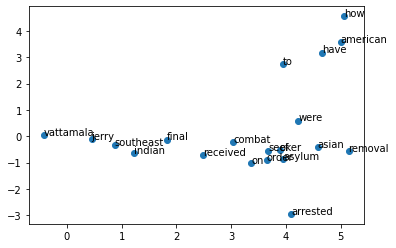

In [ ]:
# Create Scatter plot to visualize words
plt.scatter(result[:20, 0], result[:20, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:20]):
  plt.annotate(word, xy=(result[i, 0], result[i,1]))
plt.show()

In [ ]:
# Pickle dataframe
df.to_pickle('/content/drive/MyDrive/XMP Preprocessing/cleaned_data.pkl')